In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

In [8]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)
    for filename in filenames:
        print("   ", filename)

/kaggle/input
/kaggle/input/gene-expression-cancer-rna-seq
/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531
/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531
    data.csv
    labels.csv


In [9]:
data_path = "/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/data.csv"
labels_path = "/kaggle/input/gene-expression-cancer-rna-seq/TCGA-PANCAN-HiSeq-801x20531/TCGA-PANCAN-HiSeq-801x20531/labels.csv"

X_full = pd.read_csv(data_path)
y = pd.read_csv(labels_path)['Class']

X = X_full.drop(columns=['Unnamed: 0'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train:", X_train.shape)
print("Test:", X_test.shape)

Train: (640, 20531)
Test: (161, 20531)


In [10]:
svm_model = SVC(
    kernel='linear',
    C=1.0,
    random_state=42
)

svm_model.fit(X_train, y_train)

print("SVM trained")

SVM trained


In [11]:
y_pred_svm = svm_model.predict(X_test)

acc_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print(f"SVM Accuracy: {acc_svm:.4f}")
print(f"SVM F1-score: {f1_svm:.4f}")

SVM Accuracy: 0.9938
SVM F1-score: 0.9938


<Figure size 800x600 with 0 Axes>

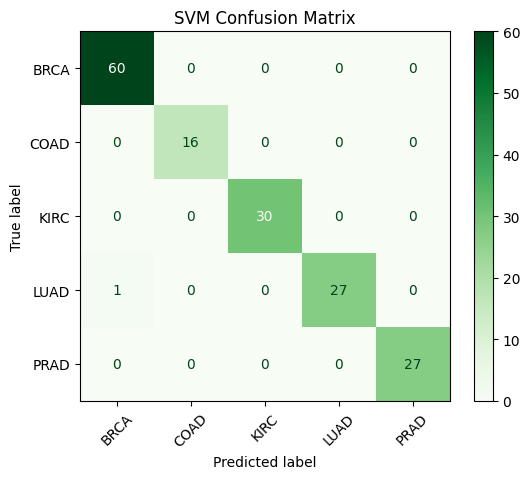

In [12]:
cm_svm = confusion_matrix(y_test, y_pred_svm, labels=svm_model.classes_)

plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(cm_svm, display_labels=svm_model.classes_)
disp.plot(cmap='Greens')
plt.title("SVM Confusion Matrix")
plt.xticks(rotation=45)
plt.show()

## SVM Results

- Full scaled features (20,531 genes, no PCA)
- Train: 640 samples
- Test: 161 samples
- Accuracy: 0.9938 (99.38%)
- F1-score (weighted): 0.9938

Same performance as Logistic Regression baseline.

Confusion matrix is almost perfect - only 1 mistake (1 LUAD classified as BRCA).

SVM is supposed to be strong for high-dimensional gene data, but here it didn't improve over logistic.  
The data is very separable even with simple models.